In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merging Datasets

In [466]:
# taken from: https://www.stats.govt.nz/experimental/covid-19-data-portal on 2023-09-09
df_raw = pd.read_excel("data/covid_19_data_portal.xlsx",
                       sheet_name='data')
df_raw = df_raw[["ResourceID", "Period", "Label1", "Value", "Unit", "Measure"]]

In [467]:
def process_df(df, resource, label, val_name):
    df['Period'] = pd.to_datetime(df['Period'])
    return df.query('ResourceID == @resource & Label1 == @label')\
                .rename({'Value':val_name}, axis=1)\
                .drop(["ResourceID", "Label1", "Unit", "Measure"], axis=1)\
                .set_index("Period")\
                .copy()

border_df_daily = process_df(df_raw, "CPTRA1", "Total", "border_arrivals") # daily
border_df = border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals']\
                            .agg(['sum', len, 'mean', 'min', 'max']) # monthly
border_df = border_df.rename({"sum":"total_border",
                                "len":"count_border",
                                "mean":"mean_border",
                                "min":"min_border",
                                "max":"max_border"}, axis=1)

activ_df = process_df(df_raw, "CPACT12", "New Zealand Activity Index (NZAC)", "activity") # monthly
stu_df = process_df(df_raw, "CPVIS1", "Fee paying", "student_visas") # monthly
work_df = process_df(df_raw, "CPVIS2", "Total", "work_visas") # monthly

df = border_df.join(activ_df).join(work_df).join(stu_df).dropna()

<Axes: xlabel='Period'>

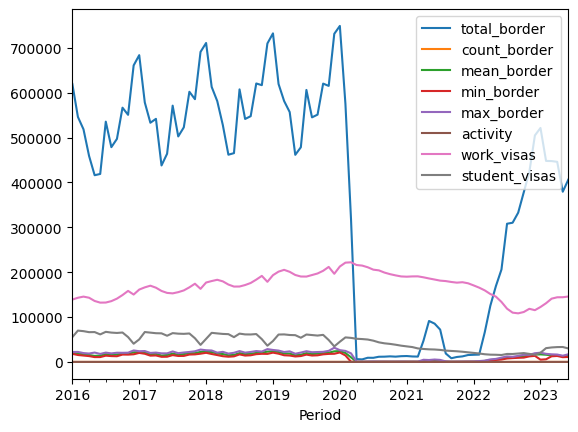

In [468]:
df.plot()

In [469]:
df.describe()

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas,student_visas
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,385848.644444,30.422222,12688.128833,10107.833333,15450.200000,2.404609,169767.800000,45429.266667
std,245591.311144,0.834344,8074.821791,6995.711974,9400.945903,4.093974,28209.648699,17494.452495
min,5622.000000,28.000000,181.354839,0.000000,513.000000,-13.616500,108300.000000,15435.000000
25%,86837.250000,30.000000,2870.032258,674.500000,4923.750000,1.312900,146583.750000,30039.000000
50%,464733.000000,31.000000,15491.100000,12608.500000,19263.000000,2.219700,173404.500000,50493.000000
75%,574226.250000,31.000000,18759.483871,15389.250000,22253.500000,3.206800,190712.250000,61342.500000
max,748999.000000,31.000000,24161.258065,21076.000000,31612.000000,33.793400,222039.000000,69807.000000


In [470]:
border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals'].agg(['sum', len, 'mean', 'min', 'max']) # monthly

,sum,len,mean,min,max
Period,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0
...,...,...,...,...,...
2023-05-31,379405.0,31,12238.870968,10589.0,13873.0
2023-06-30,406391.0,30,13546.366667,11067.0,17005.0
2023-07-31,517796.0,31,16703.096774,13209.0,19874.0


In [471]:
df.rename({"sum":"total_border",
           "len":"count_border",
           "mean":"mean_border",
           "min":"min_border",
           "max":"max_border"}, axis=1)

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


In [472]:
df

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


In [473]:
work_df.head(10)

,work_visas
Period,
2015-01-31,123504.0
2015-02-28,126324.0
2015-03-31,128370.0
2015-04-30,126129.0
2015-05-31,119424.0
2015-06-30,115965.0
2015-07-31,114624.0
2015-08-31,116472.0
2015-09-30,121068.0


# Processing

In [474]:
from statsmodels.tsa.stattools import adfuller, pacf, acf

In [475]:
def diff_n(df, n=1):
    df = df.copy()
    for i in range(n):
        df = df.diff().dropna()
    return df

def dft(series):
    return round(adfuller(series)[1], 5)

In [476]:
dft_df = pd.DataFrame()
for i in df.columns:
    for j in range(5):
        dft_df.loc[i, j] = dft(diff_n(df[i], j))

dft_df
# we'll difference everything twice for simplicity

,0,1,2,3,4
total_border,0.29189,0.24490,0.00000,0.0,0.0
count_border,0.09044,0.00000,0.00000,0.0,0.0
mean_border,0.28806,0.02061,0.00000,0.0,0.0
min_border,0.54119,0.00000,0.00000,0.0,0.0
max_border,0.53686,0.00000,0.00000,0.0,0.0
activity,0.00000,0.00000,0.00000,0.0,0.0
work_visas,0.07327,0.54122,0.00031,0.0,0.0
student_visas,0.48119,0.77719,0.00000,0.0,0.0


In [512]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def xform_ts(df, scaler):
    df2 = diff_n(df.copy(), 2)
    df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
    return df2

df2 = xform_ts(df, scaler)

In [513]:
df_initial = df.iloc[:2, :] # bits which will be lost during diffing, needed to un-xform data

def inv_diff(df, org, scaler):
    # assumes two differences
    # unscale the values
    df = df.copy()
    df[df.columns] = scaler.inverse_transform(df[df.columns])

    # undiff the data
    # add on the last NA value (DIFFERENCED), in this case from the second row as we difference twice to go from d2 => d1
    org_d1 = pd.DataFrame(org.diff().iloc[1]).T 
    df2 = pd.concat([org_d1, df])
    df2 = df2.cumsum()
    # add on the first NA value (RAW) to go from d1 => raw
    df2 = pd.concat([pd.DataFrame(org.iloc[0]).T, df2])
    df2 = df2.cumsum()
    return df2

In [514]:
df2

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-03-31,0.514866,1.506355,-0.368420,0.367035,-0.628653,-0.072632,-0.186396,-1.935828
2016-04-30,-0.378893,-1.137276,0.246942,0.004487,0.349913,0.005797,-0.606814,-0.105078
2016-05-31,0.174658,0.751031,-0.184432,-0.309278,0.691404,-0.056323,-0.576811,0.335214
2016-06-30,0.513613,-0.759615,0.903928,0.649626,-1.167424,0.088162,0.436730,-0.647495
2016-07-31,1.294544,0.751031,1.034562,0.883146,1.329599,-0.091464,0.479906,1.383387
...,...,...,...,...,...,...,...,...
2023-02-28,-1.048192,-1.137276,-0.522462,2.666442,-0.821679,-0.004346,0.169257,0.745954
2023-03-31,0.827300,2.261678,-0.289493,1.684445,0.300873,-0.070235,0.220483,-1.059731
2023-04-30,-0.028121,-1.514938,0.739238,-1.738686,0.136510,-0.074156,-0.868798,-0.068418


In [515]:
df

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


In [517]:
inv_diff(df2, df_initial, scaler)

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas,student_visas
2016-01-31,619487.0,31.0,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29.0,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31.0,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30.0,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31.0,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28.0,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31.0,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30.0,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0
2023-05-31,379405.0,31.0,12238.870968,10589.0,13873.0,0.8810,144216.0,33243.0


<Axes: xlabel='Period'>

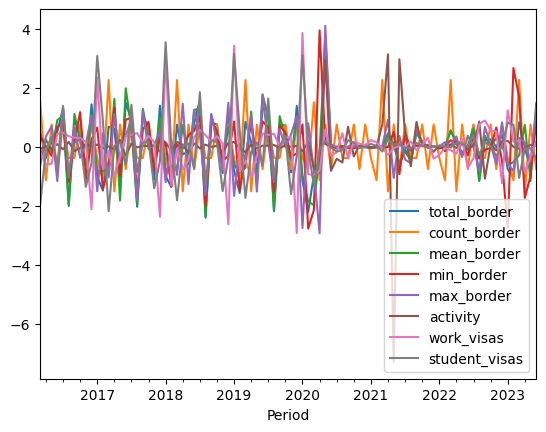

In [500]:
df2.plot()

In [481]:
y_train = df2.iloc[:, -1:]
x_train = df2.iloc[:, :-1]

In [482]:
y_train

,student_visas
Period,
2016-03-31,-15726.0
2016-04-30,-1044.0
2016-05-31,2487.0
2016-06-30,-5394.0
2016-07-31,10893.0
...,...
2023-02-28,5781.0
2023-03-31,-8700.0
2023-04-30,-750.0


In [483]:
x_train

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas
Period,,,,,,,
2016-03-31,45930.0,4.0,-947.931034,1306.0,-2774.0,-0.5286,-1557.0
2016-04-30,-31819.0,-3.0,682.102076,50.0,1596.0,0.0374,-5004.0
2016-05-31,16335.0,2.0,-460.563441,-1037.0,3121.0,-0.4109,-4758.0
2016-06-30,45821.0,-2.0,2422.390323,2285.0,-5180.0,0.6318,3552.0
2016-07-31,113755.0,2.0,2768.427957,3094.0,5971.0,-0.6645,3906.0
...,...,...,...,...,...,...,...
2023-02-28,-90042.0,-3.0,-1355.972350,9272.0,-3636.0,-0.0358,1359.0
2023-03-31,73109.0,6.0,-738.861751,5870.0,1377.0,-0.5113,1779.0
2023-04-30,-1305.0,-4.0,1986.142704,-5989.0,643.0,-0.5396,-7152.0


In [484]:
df2.iloc[:, -1:]

,student_visas
Period,
2016-03-31,-15726.0
2016-04-30,-1044.0
2016-05-31,2487.0
2016-06-30,-5394.0
2016-07-31,10893.0
...,...
2023-02-28,5781.0
2023-03-31,-8700.0
2023-04-30,-750.0


In [485]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [486]:
mod1 = VAR(df2)

In [487]:
res1 = mod1.fit(8)

In [488]:
res1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Oct, 2023
Time:                     16:08:19
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    99.6525
Nobs:                     80.0000    HQIC:                   90.3770
Log likelihood:          -3754.89    FPE:                6.17521e+38
AIC:                      84.1693    Det(Omega_mle):     5.30185e+36
--------------------------------------------------------------------
Results for equation total_border
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                -3688.322059      3873.302803           -0.952           0.341
L1.total_border         -5.538832         1.933695           -2.864           0.004
L1.count_border     -30922.390038     121

In [489]:
mod1

In [490]:
print(mod1.select_order())

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 8, BIC -> 8, FPE -> 8, HQIC ->  8>


In [491]:
df2.iloc[:, -1]

Period
2016-03-31   -15726.0
2016-04-30    -1044.0
2016-05-31     2487.0
2016-06-30    -5394.0
2016-07-31    10893.0
               ...   
2023-02-28     5781.0
2023-03-31    -8700.0
2023-04-30     -750.0
2023-05-31     -606.0
2023-06-30    -3408.0
Freq: M, Name: student_visas, Length: 88, dtype: float64

In [492]:
pd.date_range('2023-06-30', periods=7, freq='M')[1:]

DatetimeIndex(['2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [493]:
for1 = pd.DataFrame(res1.forecast(df2.values[-8:], steps=6),
                    columns=df.columns,
                    index  =pd.date_range('2023-06-30', periods=7, freq='M')[1:])